# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 7. Решающие деревья и случайные леса.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.




**Баллы за задание:**

* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 50 баллов
* Задача 3 &mdash; 30 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [1385]:
# Bot check

# HW_ID: fpmi_ad7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1386]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import graphviz

warnings.filterwarnings('ignore')
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [1387]:
from sklearn import datasets
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/trees.html">ноутбук</a> с занятия по решающим деревьям.

---
### Задача 1.

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
Нет смысла, так как это не изменит выбора признаков

* немонотонные функции от одного признака;
Нет. Это изменит "вес" признаков

* линейные функции от нескольких признаков;
Можно использовать, таким образом мы имеем возможность снизить кол-во вершин дерева

* нелинейные функции от нескольких признаков;
Очевидно, нет, так как это уничтожит истинные зависимости между признаками

* стандартизация признаков;
У признаков нет "весов" -> значит и смысла их стандартизировать тоже

* преобразования категориальных признаков.
Да, смысл есть, например OneHotEncoding. Таким образом мы добьемся того, что будем воспринимать каждый признак отдельно из одной категории.

Например, вместо/дополнительно признака $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

---
### Задача 2.

Рассмотрим данные из <a href="https://miptstats.github.io/courses/ad_fivt/task6.html" target="_blank">предыдущего домашнего задания</a>. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1.

In [1388]:
dt = pd.read_csv('day.csv')
dt.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [1389]:
# Уберем лишние признаки
dt = dt.drop(columns=['dteday', 'registered', 'instant', 'yr', 'casual'], axis=1)
dt.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [1390]:
tmp_df, test = train_test_split(dt, test_size=0.2)
train, valid = train_test_split(tmp_df, test_size=0.25)

In [1391]:
target_features = 'cnt'
categorial_features = ['mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
real_features = ['windspeed', 'temp', 'hum']

Выполните необходимые преобразования признаков.

*Замечание.* Если в валидационной и/или тестовой частях есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики.

Посмотрим на выбросы в VALID и TEST выборках и уберем их, если они есть.

Text(0.5, 1.0, 'Valid DF')

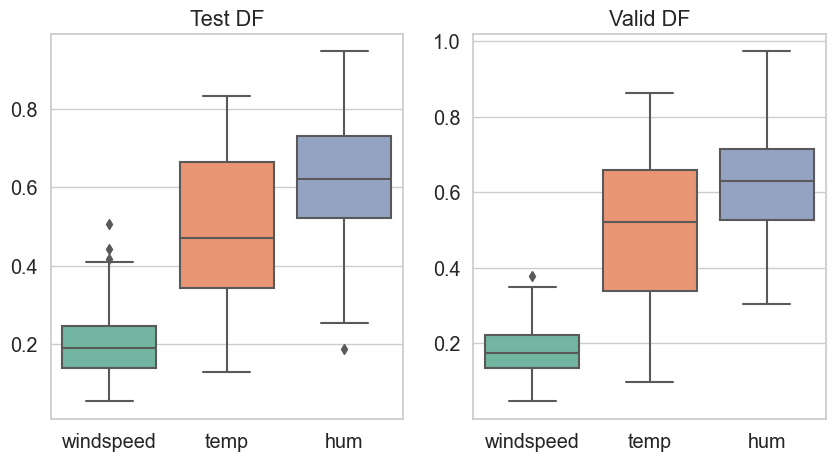

In [1392]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=test[real_features])
plt.title('Test DF')

plt.subplot(1, 2, 2)
sns.boxplot(data=valid[real_features])
plt.title('Valid DF')

In [1393]:
test = test[test['windspeed'] < 0.35]
valid = valid[valid['windspeed'] < 0.4][valid['hum'] > 0.25]

Теперь закодируем категориальные признаки на всех выборках

In [1394]:
encoder = OneHotEncoder(drop='first', sparse=False)
train_cat = encoder.fit_transform(train[categorial_features])
X_train = np.hstack([train_cat, train[real_features]])

In [1395]:
encoder = OneHotEncoder(drop='first', sparse=False)
test_cat = encoder.fit_transform(test[categorial_features])
X_test = np.hstack([test_cat, test[real_features]])

In [1396]:
encoder = OneHotEncoder(drop='first', sparse=False)
valid_cat = encoder.fit_transform(valid[categorial_features])
X_valid = np.hstack([valid_cat, valid[real_features]])

In [1397]:
encoder.categories_

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([0, 1]),
 array([0, 1, 2, 3, 4, 5, 6]),
 array([0, 1]),
 array([1, 2, 3])]

Обучите решающее дерево глубины 3 и визуализируйте его. 

*Рекомендуется сохранить визуализацию в html и отправить ее вместе с решением.*

Для удобства в дальнейшем положим в один лист все признаки, кроме таргет, то есть новые закодированные и вещественные


In [1398]:
real_and_categorial_features = list(encoder.get_feature_names_out(categorial_features)) + real_features

Напишем функцию визуализации дерева

In [1399]:
def get_graphviz_graph(decision_tree_regressor):
    '''
    Функция для обучения решающего дерева и построения
    по нему графа graphviz для визуализации
    '''
    decision_tree_regressor.fit(X_train, train[target_features])
    dot_data = export_graphviz(
        decision_tree_regressor, out_file=None,
        feature_names=real_and_categorial_features, class_names='Price',
        filled=True, rounded=True, special_characters=True
    )
    return graphviz.Source(dot_data)

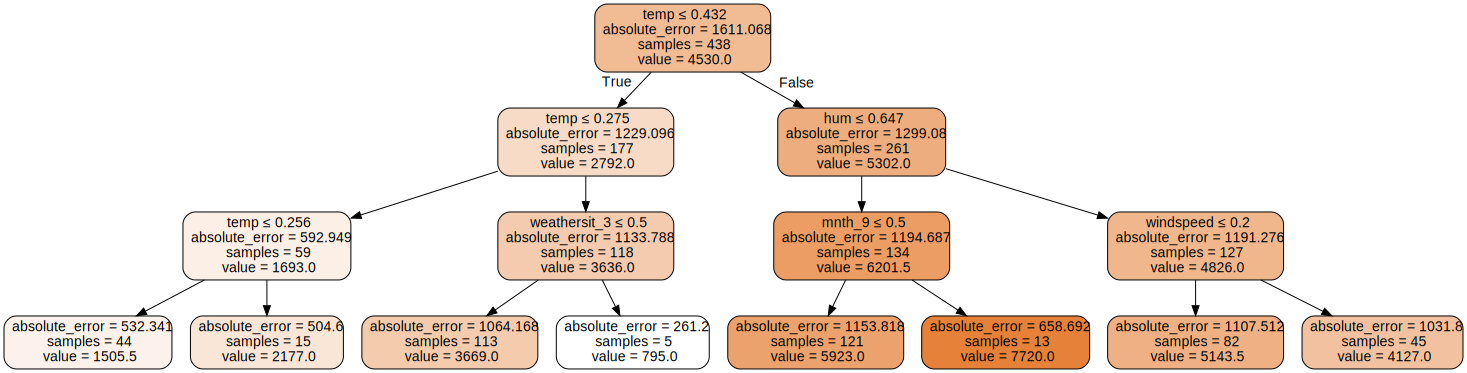

In [1400]:
camera_regressor = DecisionTreeRegressor(
    criterion='absolute_error', max_depth=3
)
graph = get_graphviz_graph(camera_regressor)
graph

In [1401]:
graph.render('max_depth_3')

'max_depth_3.pdf'

Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график.

In [1402]:
grid = range(1, 50)
abs_errors_depths = list()

for depth in grid:
    tmp_regressor = DecisionTreeRegressor(criterion='absolute_error', max_depth=depth)
    tmp_regressor.fit(X_train, train[target_features])

    curr_predict = tmp_regressor.predict(X_valid)
    tmp_error = metrics.mean_absolute_error(valid[target_features], curr_predict)
    abs_errors_depths.append(tmp_error)

Text(0, 0.5, 'MAE')

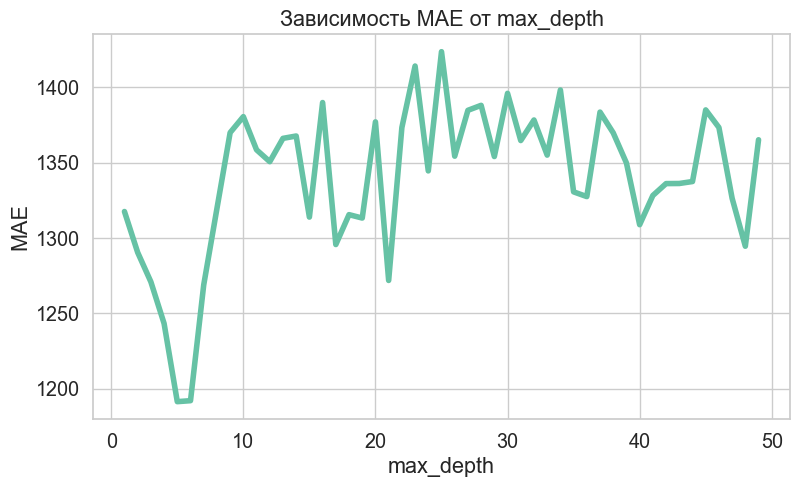

In [1403]:
plt.figure(figsize=(9, 5))

plt.plot(grid, abs_errors_depths, lw=4)
plt.title('Зависимость MAE от max_depth')
plt.xlabel('max_depth')
plt.ylabel('MAE')

Найдем **max_depth**, при котором *MAE* минимально

In [1404]:
best_depth = grid[abs_errors_depths.index(min(abs_errors_depths))]
best_depth

5

Соответственно, лучший результат достигается при значении **max_depth = best_depth**

Аналогичным образом подберите минимальное число объектов в листе, зафиксировав при этом подобранное значение максимальной глубины.

In [1405]:
grid = range(2, 50)
abs_errors_split = list()

for samples_split in grid:
    tmp_regressor = DecisionTreeRegressor(criterion='absolute_error',
                                          max_depth=best_depth,
                                          min_samples_split=samples_split)
    tmp_regressor.fit(X_train, train[target_features])

    curr_predict = tmp_regressor.predict(X_valid)
    tmp_error = metrics.mean_absolute_error(valid[target_features], curr_predict)
    abs_errors_split.append(tmp_error)

Text(0, 0.5, 'MAE')

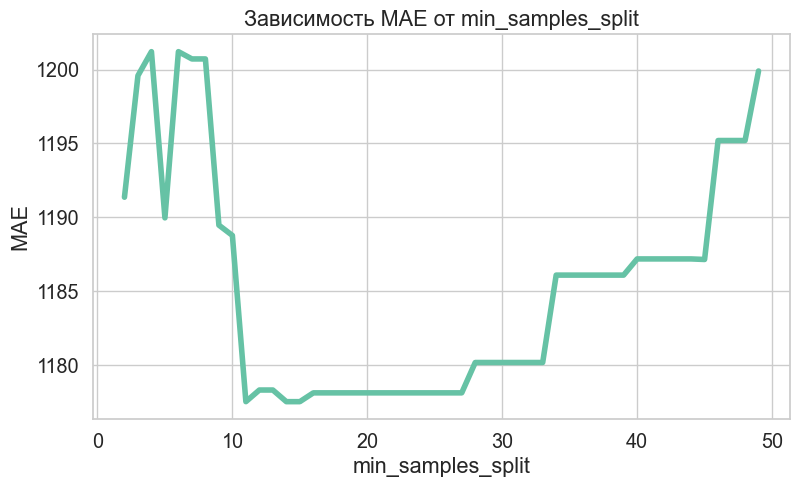

In [1406]:
plt.figure(figsize=(9, 5))

plt.plot(grid, abs_errors_split, lw=4)
plt.title('Зависимость MAE от min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('MAE')

In [1407]:
best_min_samples_split = grid[abs_errors_split.index(min(abs_errors_split))]
best_min_samples_split

11

Соответственно, лучший результат достигается при значении **min_samples_split = best_min_samples_split**

Визуализируйте дерево при оптимальных гиперпараметрах и посчитайте его ошибку на тестовой части выборки.

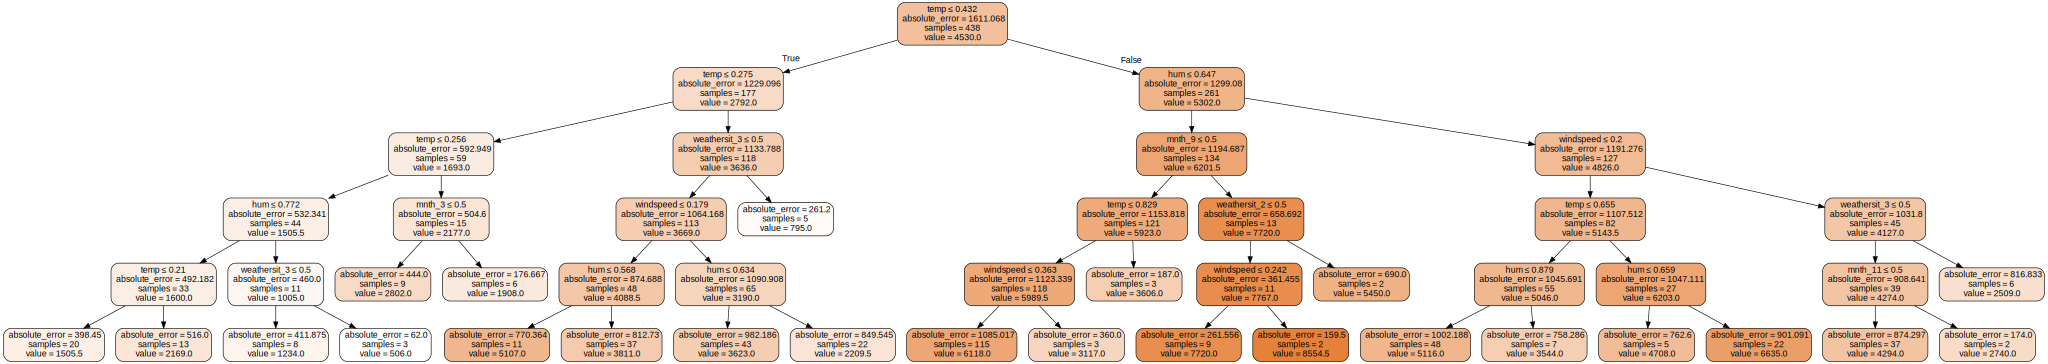

In [1408]:
camera_regressor = DecisionTreeRegressor(
    criterion='absolute_error', max_depth=best_depth, min_samples_split=best_min_samples_split
)
graph = get_graphviz_graph(camera_regressor)
graph

In [1409]:
graph.render('best_depth_and_samples_split')

'best_depth_and_samples_split.pdf'

In [1410]:
predict = camera_regressor.predict(X_test)

print('MAE =', metrics.mean_absolute_error(predict, test[target_features]))
print('MAPE =', metrics.mean_absolute_percentage_error(predict, test[target_features]))

MAE = 1118.953237410072
MAPE = 0.2651606015086276


Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа, 
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их с помощью `seaborn.barplot`.

In [1411]:
camera_regressor.feature_importances_

array([0.        , 0.00746717, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03539847, 0.        , 0.00814168,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00952933,
       0.0591371 , 0.08736554, 0.63856302, 0.15439769])

In [1412]:
real_and_categorial_features

['mnth_2',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'mnth_11',
 'mnth_12',
 'holiday_1',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'workingday_1',
 'weathersit_2',
 'weathersit_3',
 'windspeed',
 'temp',
 'hum']

In [1413]:
important_features_value = list()
important_features_name = list()

In [1414]:
important_features_value.append(sum(camera_regressor.feature_importances_[0:11]))
important_features_name.append('mnth')

important_features_value.append(sum(camera_regressor.feature_importances_[11:12]))
important_features_name.append('holiday')

important_features_value.append(sum(camera_regressor.feature_importances_[12:18]))
important_features_name.append('weekday')

important_features_value.append(sum(camera_regressor.feature_importances_[18:21]))
important_features_name.append('weathersit')

important_features_value.append(camera_regressor.feature_importances_[21])
important_features_name.append('windspeed')

important_features_value.append(camera_regressor.feature_importances_[22])
important_features_name.append('temp')

important_features_value.append(camera_regressor.feature_importances_[23])
important_features_name.append('hum')

important_features_value

[0.051007309680870035,
 0.0,
 0.0,
 0.06866642895346764,
 0.08736554347180124,
 0.6385630237118917,
 0.15439769418196947]

Остальное признаки

Text(0.5, 1.0, 'Значение важности признаков')

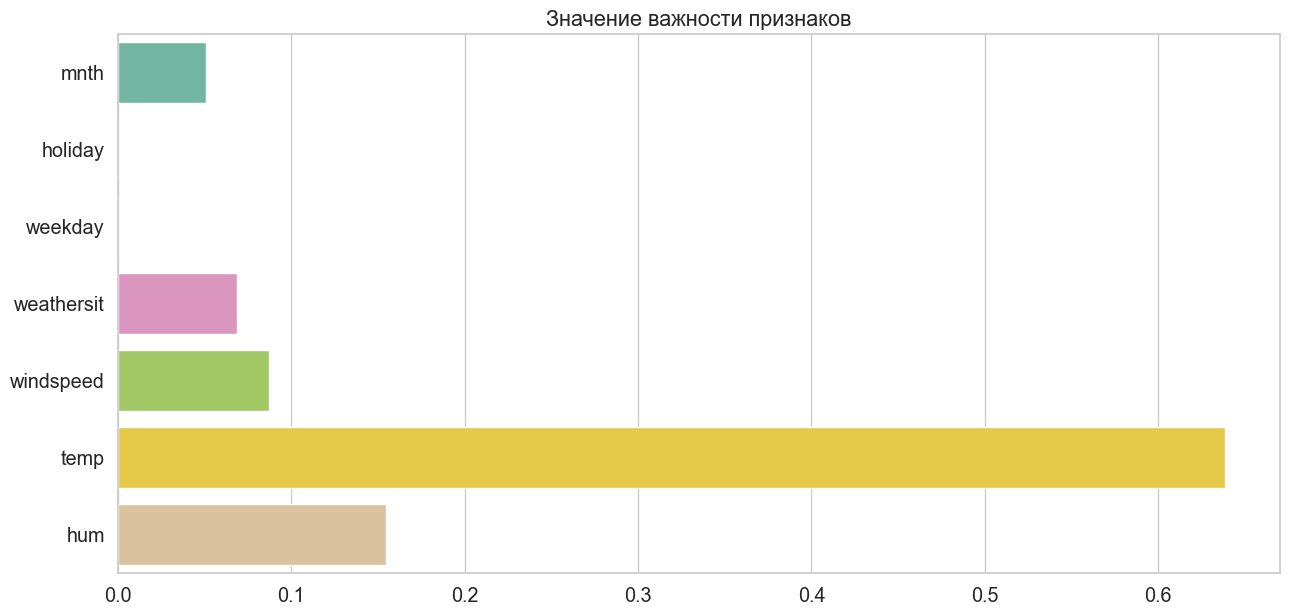

In [1415]:
plt.figure(figsize=(15, 7))
sns.barplot(y=important_features_name, x=important_features_value)
plt.title('Значение важности признаков')

Сделайте выводы.

В первую очередь, мы увидели: как рассмотренные нами гиперпараметры влияют на итоговый результат, а затем подобрали наиболее подходящие. Таким образом была решена *проблема переобучения*

Для данного набора данных были найдены признаки, которые оказывают наибольшее влияние на *target*. В первую очередь **temp**, менее важные признаки - это hum, windspeed, weathersit и mnth.


---
### Задача 3.

Для данных из предыдущей части обучите случайный лес на 500 деревьев.

In [1416]:
num_of_estimators = 500

In [1417]:
model = RandomForestRegressor(n_estimators=num_of_estimators)
model.fit(X_train, train[target_features])

RandomForestRegressor(n_estimators=500)

In [1418]:
estimators = model.estimators_

Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

In [1419]:
train_predict, valid_predict = [], []
train_errors, valid_errors = [], []

In [1420]:
for k in range(1, 500):
    train_predict.append(estimators[k - 1].predict(X_train))
    valid_predict.append(estimators[k - 1].predict(X_valid))

    tmp_train_err = metrics.mean_absolute_error(np.array(train_predict).mean(axis=0), train[target_features])
    train_errors.append(tmp_train_err)

    tmp_valid_err = metrics.mean_absolute_error(np.array(valid_predict).mean(axis=0), valid[target_features])
    valid_errors.append(tmp_valid_err)

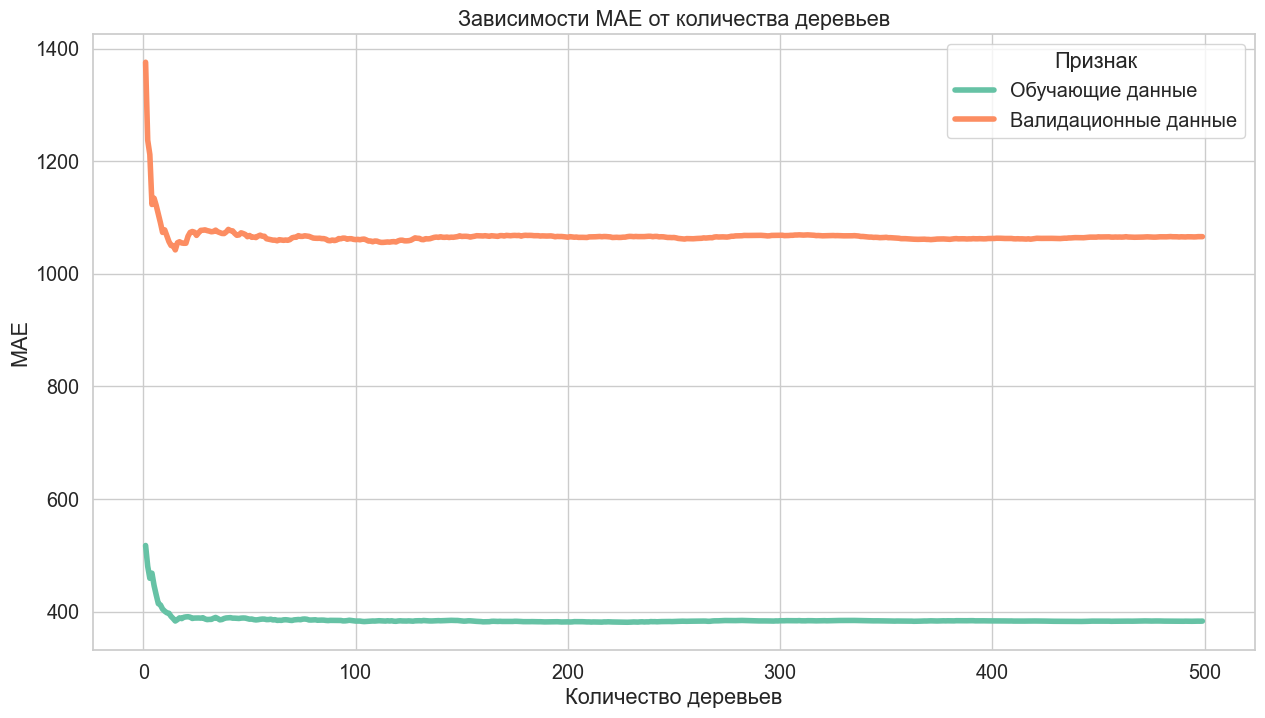

In [1421]:
fig = plt.figure(figsize=(15, 8))

plt.plot(range(1, 500), train_errors, label='Обучающие данные', lw=4)
plt.plot(range(1, 500), valid_errors, label='Валидационные данные', lw=4)
plt.xlabel('Количество деревьев')
plt.ylabel('MAE')
plt.title(label='Зависимости MAE от количества деревьев')
plt.legend(title='Признак')

In [1422]:
print('Минимальная ошибка train =', min(train_errors))
print('Минимальная ошибка valid =', min(valid_errors))

Минимальная ошибка train = 381.2889629896659
Минимальная ошибка valid = 1042.492694063927


In [1423]:
print(min(valid_errors) / min(train_errors))

2.734127644004691


Из графика видно, что ошибка на обучающих данных намного меньше, чем на валидационных и с какого-то момента она почти перестает уменьшатся. Также можно наглядно показать отношение минимальной ошибки на valid к минимальной ошибке на train, видно, что ошибки отличаются почти в **3** раза

Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`.

In [1425]:
important_features_value.append(sum(model.feature_importances_[0:11]))
important_features_name.append('mnth')

important_features_value.append(sum(model.feature_importances_[11:12]))
important_features_name.append('holiday')

important_features_value.append(sum(model.feature_importances_[12:18]))
important_features_name.append('weekday')

important_features_value.append(sum(model.feature_importances_[18:21]))
important_features_name.append('weathersit')

important_features_value.append(model.feature_importances_[21])
important_features_name.append('windspeed')

important_features_value.append(model.feature_importances_[22])
important_features_name.append('temp')

important_features_value.append(model.feature_importances_[23])
important_features_name.append('hum')

Text(0, 0.5, 'Признак')

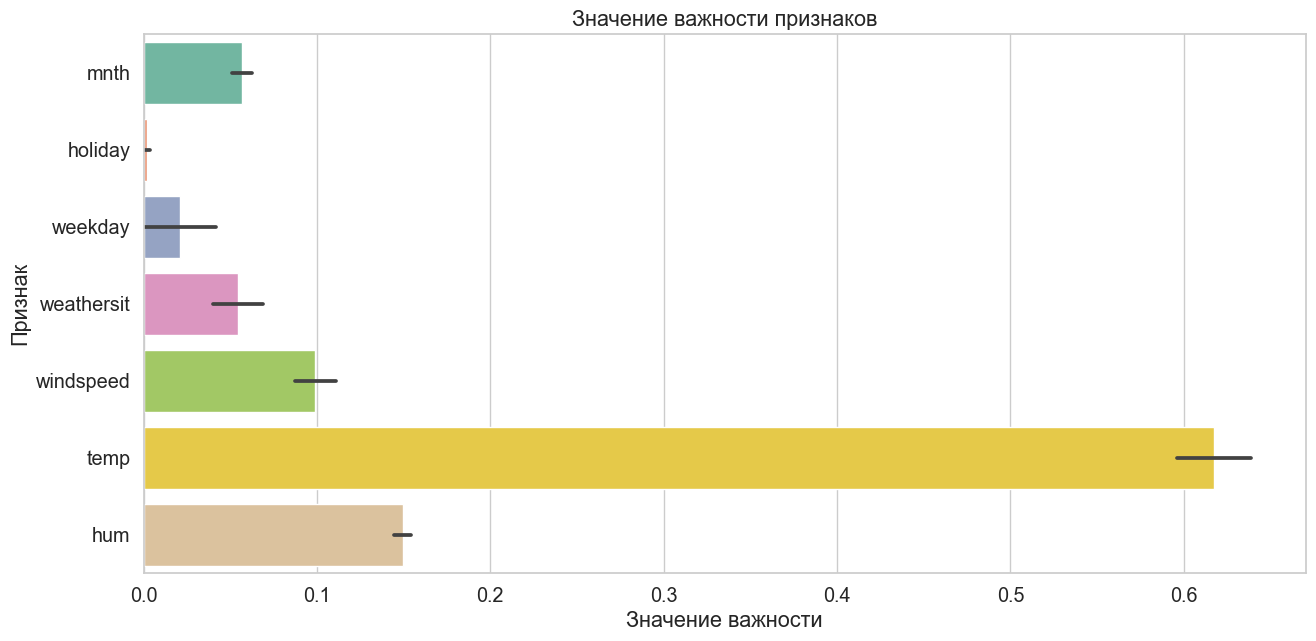

In [1426]:
plt.figure(figsize=(15, 7))
sns.barplot(y=important_features_name, x=important_features_value)
plt.title('Значение важности признаков')
plt.xlabel('Значение важности')
plt.ylabel('Признак')

Сделайте выводы.

Можно увидеть график, очень похожий на тот, что был в задании выше, что логично, важные признаки остаются теми же. Можно сравнить значение **MAE** для предыдущей модели, и для этой.

In [1427]:
metrics.mean_absolute_error(model.predict(X_test), test[target_features]), metrics.mean_absolute_error(camera_regressor.predict(X_test), test[target_features])

(1016.6822014388489, 1118.953237410072)

Как мы видим, ошибка меньше для случайного леса, по сравнению с ошибкой на дереве с подобранными гиперпараметрами.